In [1]:
library(paletteer)
library(spiro)
library(magrittr)

In [2]:
wedding = read.csv('../data/raw/wedding_playlist.csv', stringsAsFactors = FALSE)
top2018 = read.csv('../data/raw/top2018hits_playlist.csv', stringsAsFactors = FALSE)
broken = read.csv('../data/raw/broken_heart_playlist.csv', stringsAsFactors = FALSE)

In [17]:
head(wedding, 8)

artist,album_title,album_uri,track_title,track_id,release_date,danceability,energy,key,loudness,⋯,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
John Legend,Love In The Future (Expanded Edition),spotify:album:4OTAx9un4e6NfoHuVRiOrC,All of Me,3U4isOIWM3VvDubwSI3y7a,2013-08-30,0.422,0.264,8,-7.064,⋯,0.1320,0.331,119.930,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/audio-analysis/3U4isOIWM3VvDubwSI3y7a,269560,4
Bruno Mars,Doo-Wops & Hooligans,spotify:album:1uyf3l2d4XYwiEqAb7t7fX,Marry You,22PMfvdz35fFKYnJyMn077,2010-10-05,0.620,0.832,10,-4.848,⋯,0.1040,0.481,144.926,audio_features,22PMfvdz35fFKYnJyMn077,spotify:track:22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/tracks/22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/audio-analysis/22PMfvdz35fFKYnJyMn077,230120,4
Ed Sheeran,x (Deluxe Edition),spotify:album:1xn54DMo2qIqBuMqHtUsFd,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,2014-06-21,0.781,0.445,2,-6.061,⋯,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/audio-analysis/34gCuhDGsG4bRPIf9bb02f,281560,4
Christina Perri,A Thousand Years,spotify:album:15yvc643iYfQtb6zh9NEJo,A Thousand Years,6lanRgr6wXibZr8KgzXxBl,2011-10-18,0.421,0.407,10,-7.445,⋯,0.1100,0.161,139.028,audio_features,6lanRgr6wXibZr8KgzXxBl,spotify:track:6lanRgr6wXibZr8KgzXxBl,https://api.spotify.com/v1/tracks/6lanRgr6wXibZr8KgzXxBl,https://api.spotify.com/v1/audio-analysis/6lanRgr6wXibZr8KgzXxBl,285120,3
The Lumineers,The Lumineers,spotify:album:6NWYmlHxAME5KXtxrTlUxW,Ho Hey,0W4Kpfp1w2xkY3PrV714B7,2012-04-03,0.685,0.466,0,-9.074,⋯,0.0915,0.353,79.936,audio_features,0W4Kpfp1w2xkY3PrV714B7,spotify:track:0W4Kpfp1w2xkY3PrV714B7,https://api.spotify.com/v1/tracks/0W4Kpfp1w2xkY3PrV714B7,https://api.spotify.com/v1/audio-analysis/0W4Kpfp1w2xkY3PrV714B7,163133,4
Train,"Save Me, San Francisco (Golden Gate Edition)",spotify:album:7tEPbuzTMNGSytEMdezXtS,Marry Me,0VZ9xPNa6ROafP6GYYuv2S,2009,0.366,0.269,0,-8.456,⋯,0.1080,0.492,86.577,audio_features,0VZ9xPNa6ROafP6GYYuv2S,spotify:track:0VZ9xPNa6ROafP6GYYuv2S,https://api.spotify.com/v1/tracks/0VZ9xPNa6ROafP6GYYuv2S,https://api.spotify.com/v1/audio-analysis/0VZ9xPNa6ROafP6GYYuv2S,205453,4
Jason Mraz,We Sing. We Dance. We Steal Things.,spotify:album:04G0YylSjvDQZrjOfE5jA5,Lucky,0IktbUcnAGrvD03AWnz3Q8,2008-05-12,0.623,0.417,0,-8.699,⋯,0.1350,0.721,130.032,audio_features,0IktbUcnAGrvD03AWnz3Q8,spotify:track:0IktbUcnAGrvD03AWnz3Q8,https://api.spotify.com/v1/tracks/0IktbUcnAGrvD03AWnz3Q8,https://api.spotify.com/v1/audio-analysis/0IktbUcnAGrvD03AWnz3Q8,191360,4
Ray LaMontagne,Gossip In The Grain,spotify:album:2CbLBSlkvh2vR4JRLDRQso,You Are the Best Thing,1jyddn36UN4tVsJGtaJfem,2008-10-13,0.579,0.727,10,-4.872,⋯,0.1720,0.885,170.593,audio_features,1jyddn36UN4tVsJGtaJfem,spotify:track:1jyddn36UN4tVsJGtaJfem,https://api.spotify.com/v1/tracks/1jyddn36UN4tVsJGtaJfem,https://api.spotify.com/v1/audio-analysis/1jyddn36UN4tVsJGtaJfem,231840,4


In [16]:
cupcake_creator(valence = 0.721, energy = 0.417, genre = pop)

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `colo

In [7]:
cupcake_creator <- function(valence, energy, genre){
    
valence = as.integer(round(100*valence,0))
c = paletteer_c(package = "pals", palette = "ocean.curl", n = 100)[valence]
t = 0.7
    
d <- spiro(transparency = t,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
)  %>% image_scale(scale = 0.8)

d2 <- spiro(transparency = t, rotation = 12/180*pi,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d3 <- spiro(transparency = t, rotation = 12/180*pi*2,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d4 <- spiro(transparency = t, rotation = 12/180*pi*3,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d5 <- spiro(transparency = t, rotation = 12/180*pi*4,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d6 <- spiro(transparency = t, rotation = 12/180*pi*5,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d7 <- spiro(transparency = t, rotation = 12/180*pi*6,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d8 <- spiro(transparency = t, rotation = 12/180*pi*7,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d9 <- spiro(transparency = t, rotation = 12/180*pi*78,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)

d10 <- spiro(transparency = t, rotation = 12/180*pi*9,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% image_scale(scale = 0.8)    
    

    if(energy <= 0.1){d_list = d}
    else if(energy <= 0.2){d_list = c(d,d2)}
    else if(energy > 0.2 & energy <= 0.3){d_list = c(d,d2,d3)}
    else if(energy > 0.3 & energy <= 0.4){d_list = c(d,d2,d3,d4)}
    else if(energy > 0.4 & energy <= 0.5){d_list = c(d,d2,d3,d4,d5)}
    else if(energy > 0.5 & energy <= 0.6){d_list = c(d,d2,d3,d4,d5,d6)}
    else if(energy > 0.6 & energy <= 0.7){d_list = c(d,d2,d3,d4,d5,d6,d7)}
    else if(energy > 0.7 & energy <= 0.8){d_list = c(d,d2,d3,d4,d5,d6,d7,d8)}
    else if(energy > 0.8 & energy <= 0.9){d_list = c(d,d2,d3,d4,d5,d6,d7,d8,d9)}
    else {d_list = c(d,d2,d3,d4,d5,d6,d7,d8,d9,d10)}

indie = spiro(
  fixed_radius = 121,
  cycling_radius = 20,
  pen_radius = 80,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 10000,
  colors = "black"
  ) %>% image_scale(scale = 0.15)
        
dance = spiro(
  fixed_radius = 121,
  cycling_radius = 100,
  pen_radius = 13,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 200,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

hiphop  = spiro(
  fixed_radius = 121,
  cycling_radius = 50,
  pen_radius = 80,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 200,
  colors = "black"
  ) %>% image_scale(scale = 0.15)
        
soul = spiro(
  fixed_radius = 121,
  cycling_radius = 80,
  pen_radius = 50,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 500,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

pop = spiro(
  fixed_radius = 121,
  cycling_radius = 18,
  pen_radius = 95,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 180,
  colors = "black"
  ) %>% image_scale(scale = 0.15)
        
c(d_list,genre) %>% image_merge(output = "new_cupcake.svg")
}

In [4]:
paletteer_c(package = "pals", palette = "ocean.curl", n = 11)

[1] "#151D44" "#1B4C5F" "#167B77" "#5CA687" "#B4CAAF" "#FDF5F3" "#E6B6A2"
 [8] "#D2776A" "#AC3F60" "#741A5A" "#340D35"

In [15]:
#spiro(draw_fills = F,
#  fixed_radius = 800,
#  cycling_radius = 677,
#  pen_radius = 805,
#  color_groups = 10,
# color_cycles = 10, windings = 677*2,
#  points_per_polygon = 30,
#  colors = paletteer_c(package = "pals", palette = "ocean.curl", n = 100)[81:90])

In [11]:
#spiro(file = "wrapper.svg",
#  fixed_radius = 800,
#  cycling_radius = 677,
#  pen_radius = 805,
#  color_groups = 10,
#  color_cycles = 10, windings = 677*2,
#  points_per_polygon = 30,
#  colors = paletteer_c(package = "ggthemes", palette = "Gray", n = 100)[91:100])

In [12]:
base_colors = c("#FFF2B8", "#FFE49C", "#ECCA90")

In [14]:
dance = spiro(
  fixed_radius = 121,
  cycling_radius = 100,
  pen_radius = 13,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 200,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”

In [11]:
indie = spiro(
  fixed_radius = 121,
  cycling_radius = 20,
  pen_radius = 80,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 10000,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”

In [76]:
hiphop  = spiro(
  fixed_radius = 121,
  cycling_radius = 50,
  pen_radius = 80,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 200,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”

In [10]:
soul = spiro(
  fixed_radius = 121,
  cycling_radius = 80,
  pen_radius = 50,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 500,
  colors = "black"
  ) %>% image_scale(scale = 0.15)

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”

In [9]:
pop = spiro(
  fixed_radius = 121,
  cycling_radius = 18,
  pen_radius = 95,
  color_groups = 1,
  color_cycles = 1,
  points_per_polygon = 180,
  colors = "black"
  ) %>% image_scale(scale = 0.15)


Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”

In [35]:
t = 0.8
l = '#C0C0C0'
w = 1
c = paletteer_c(package = "pals", palette = "ocean.curl", n = 100)[50]

d <- spiro(transparency = t,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
colors = c
)  %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d2 <- spiro(transparency = t, rotation = 12/180*pi,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d3 <- spiro(transparency = t, rotation = 12/180*pi*2,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d4 <- spiro(transparency = t, rotation = 12/180*pi*3,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d5 <- spiro(transparency = t, rotation = 12/180*pi*4,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d6 <- spiro(transparency = t, rotation = 12/180*pi*5,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d7 <- spiro(transparency = t, rotation = 12/180*pi*6,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d8 <- spiro( transparency = t, rotation = 12/180*pi*7,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d9 <- spiro( transparency = t, rotation = 12/180*pi*78,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

d10 <- spiro(transparency = t, rotation = 12/180*pi*9,
  fixed_radius = 3,
  cycling_radius = 1 ,
  pen_radius = 2,
    colors = c
) %>% add_lines(
    colors = l,
    line_width = w) %>% image_scale(scale = 0.8)

#c(d,d2,d3,d4,d5,d6,d7,d8,d9,d10) %>% image_merge(output = "test_icing10.svg")
d

Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `color_cycle_id`, `color_id`
Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_cycle_id" is not a graphical parameter”Warning message in .f(color_cycle_id = .l[[1L]][[1L]], color_id = .l[[2L]][[1L]], :
“"color_id" is not a graphical parameter”Adding missing grouping variables: `colo

In [41]:
c(d,d2,d3,soul) %>% image_merge(output = "test_icing.svg")

Installing package into ‘/home/thedatacurious/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
also installing the dependencies ‘sys’, ‘askpass’, ‘curl’, ‘openssl’, ‘httr’, ‘pack’



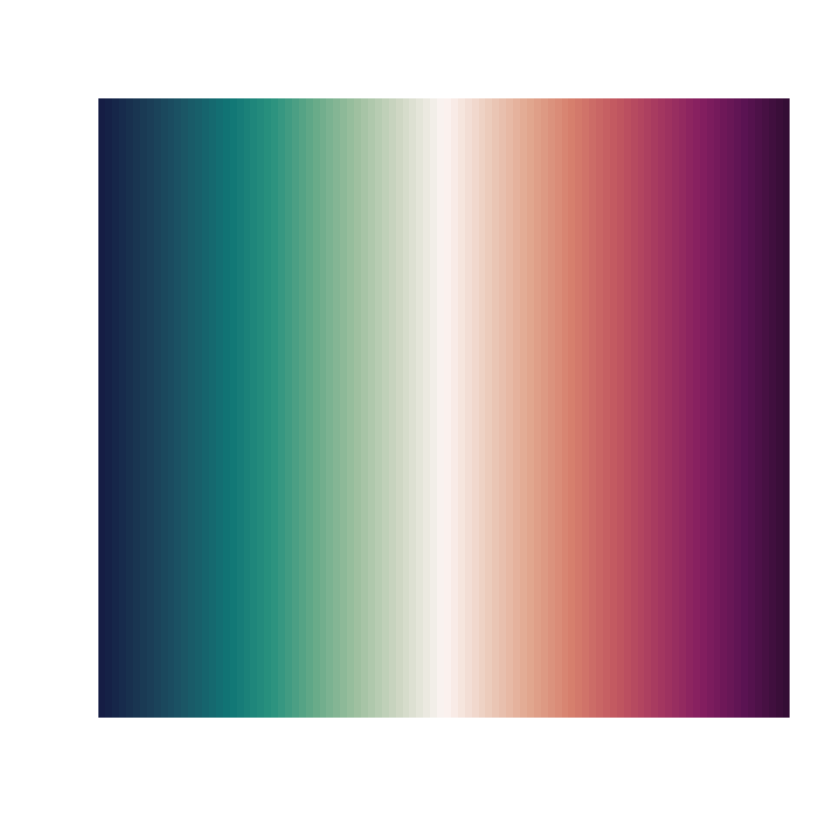

In [19]:
install.packages("swatches")
library(swatches)
c = paletteer_c(package = "pals", palette = "ocean.curl", n = 100)
show_palette(c)

In [23]:
svg("swatch.png")
show_palette(c)
dev.off()

png 
  2